# Assignment 2
# Data Visualization and Pre-processing

## 1. Perform Below Visualizations.
### Univariate Analysis
#### 1. Summary Statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
file_data = pd.read_csv('C:\Kavin\Churn_Modelling.csv')
file_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
file_data['Balance'].mean()

76485.88928799961

In [4]:
file_data['Balance'].median()

97198.54000000001

In [5]:
file_data['Balance'].std()

62397.40520238623

#### 2. Frequency Table

In [6]:
file_data['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

#### 3. Create Charts

<AxesSubplot:>

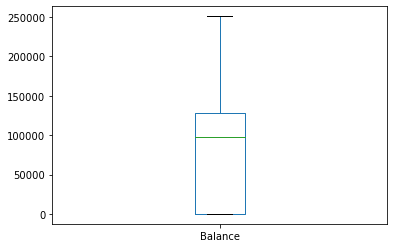

In [7]:
file_data.boxplot(column=['Balance'], grid=False)


array([[<AxesSubplot:title={'center':'Balance'}>]], dtype=object)

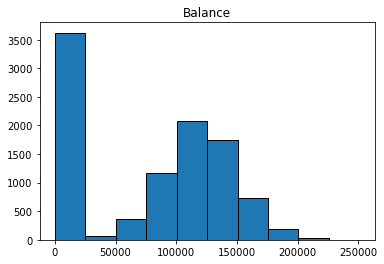

In [8]:
file_data.hist(column='Balance', grid=False, edgecolor='black')

<AxesSubplot:xlabel='Balance', ylabel='Density'>

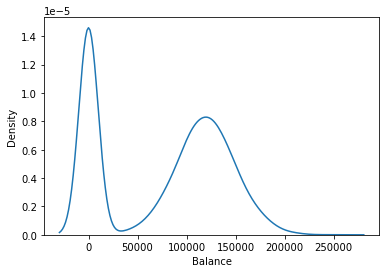

In [9]:
sns.kdeplot(file_data['Balance'])

### Bi - Variate Analysis

#### 1. Scatterplots

Text(0, 0.5, 'Age')

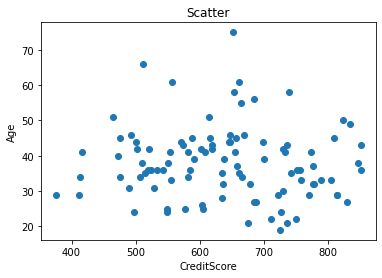

In [10]:
plt.scatter(file_data.CreditScore.head(100), file_data.Age.head(100))
plt.title('Scatter')
plt.xlabel('CreditScore')
plt.ylabel('Age')

#### 2. Correlation Coefficients

In [11]:
file_data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


#### 3. Simple Linear Regression

In [12]:
y = file_data['CustomerId']
x = file_data['HasCrCard']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CustomerId   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.967
Date:                Sun, 25 Sep 2022   Prob (F-statistic):              0.161
Time:                        15:55:30   Log-Likelihood:            -1.2602e+05
No. Observations:               10000   AIC:                         2.521e+05
Df Residuals:                    9998   BIC:                         2.521e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.569e+07   1325.512   1.18e+04      0.000    1.57e+07    1.57e+07
HasCrCard  -2213.3059   1578.103     -1.403      0.161   -5306.705     880.093
==============================================================================
Omnibus:                     8394.858   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              596.113
Skew:                           0.001   Prob(JB):                    3.60e-130
Kurtosis:                       1.804   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'CreditScore')

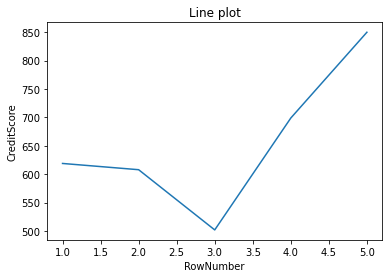

In [13]:
plt.plot(file_data['RowNumber'].head() ,file_data['CreditScore'].head(),  )

plt.title('Line plot')
plt.xlabel('RowNumber')
plt.ylabel('CreditScore')

### Multi - Variate Analysis

<AxesSubplot:>

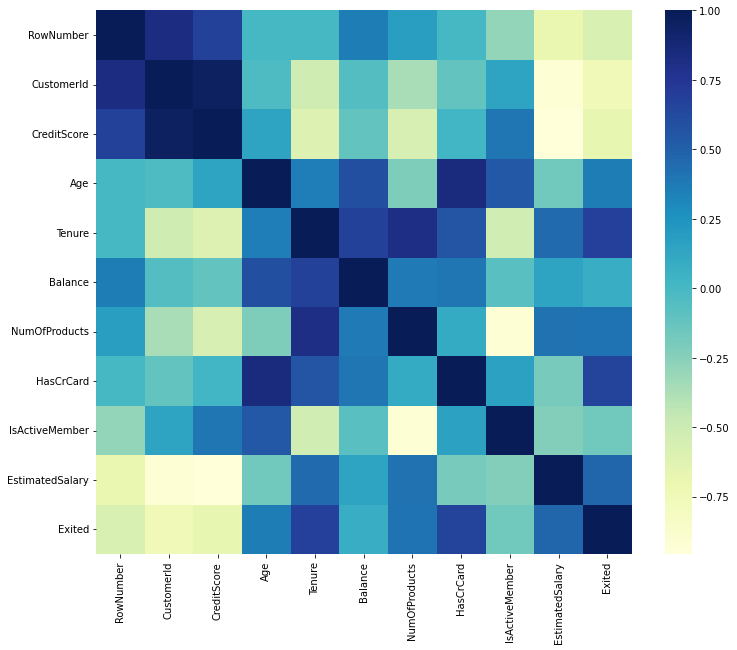

In [14]:
f = plt.subplots(figsize=(12,10))
sns.heatmap(file_data.head().corr(), cmap="YlGnBu")

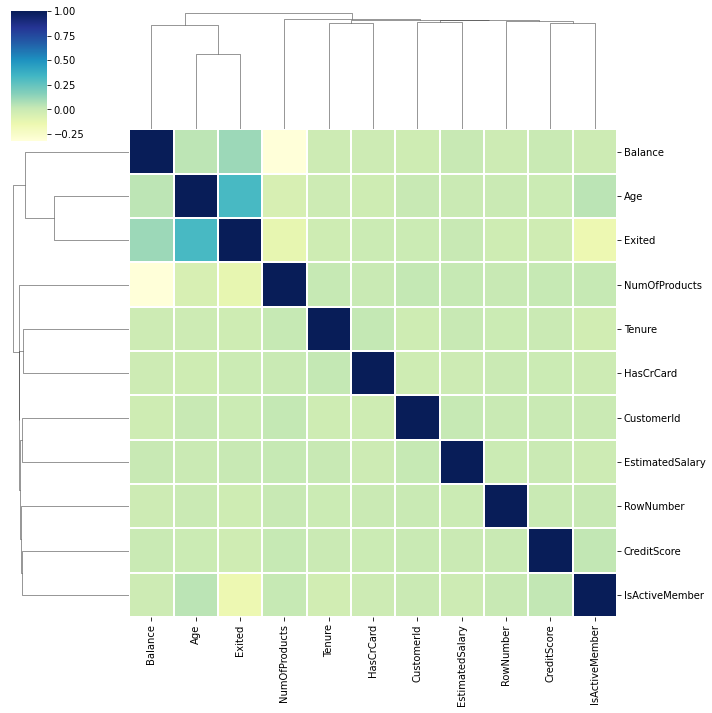

In [15]:
corrmat = file_data.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="YlGnBu", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

## 4. Perform descriptive statistics on the dataset.


In [16]:
file_data.shape

(10000, 14)

In [17]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
file_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
file_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
file_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [21]:
file_data.mean(numeric_only=True)

RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [22]:
file_data.median(numeric_only=True)

RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [23]:
file_data.mode()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15565701,Smith,850.0,France,Male,37.0,2.0,0.0,1.0,1.0,1.0,24924.92,0.0
1,2,15565706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15565714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,15565779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,15565796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15815628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,9997,15815645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,9998,15815656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,9999,15815660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
file_data.var(numeric_only=True)

RowNumber          8.334167e+06
CustomerId         5.174815e+09
CreditScore        9.341860e+03
Age                1.099941e+02
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
HasCrCard          2.077905e-01
IsActiveMember     2.497970e-01
EstimatedSalary    3.307457e+09
Exited             1.622225e-01
dtype: float64

In [25]:
file_data.std(numeric_only=True)

RowNumber           2886.895680
CustomerId         71936.186123
CreditScore           96.653299
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

In [26]:
file_data.skew(numeric_only=True)

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [27]:
file_data.kurt(numeric_only=True)

RowNumber         -1.200000
CustomerId        -1.196113
CreditScore       -0.425726
Age                1.395347
Tenure            -1.165225
Balance           -1.489412
NumOfProducts      0.582981
HasCrCard         -1.186973
IsActiveMember    -1.996747
EstimatedSalary   -1.181518
Exited             0.165671
dtype: float64

In [28]:
quantile = file_data['Balance'].quantile(q=[0.75, 0.25])
quantile

0.75    127644.24
0.25         0.00
Name: Balance, dtype: float64

<AxesSubplot:xlabel='Balance'>

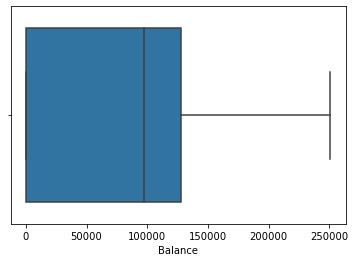

In [29]:
x = file_data.Balance
sns.boxplot(x=x)

## 5. Handle the Missing values.

In [30]:
print(file_data.isnull())

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender    Age  \
0         False       False    False        False      False   False  False   
1         False       False    False        False      False   False  False   
2         False       False    False        False      False   False  False   
3         False       False    False        False      False   False  False   
4         False       False    False        False      False   False  False   
...         ...         ...      ...          ...        ...     ...    ...   
9995      False       False    False        False      False   False  False   
9996      False       False    False        False      False   False  False   
9997      False       False    False        False      False   False  False   
9998      False       False    False        False      False   False  False   
9999      False       False    False        False      False   False  False   

      Tenure  Balance  NumOfProducts  HasCrCard  Is

In [31]:
print(file_data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [32]:
file_data.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

## 6. Find the outliers and replace the outliers

<AxesSubplot:xlabel='Age'>

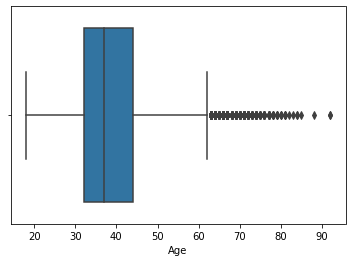

In [33]:
x = sns.boxplot(x=file_data["Age"])
x

<AxesSubplot:xlabel='Age'>

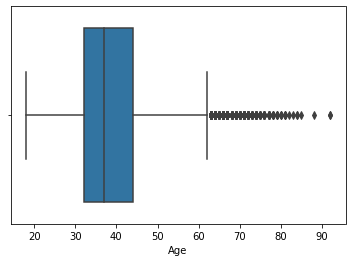

In [34]:
x = file_data.Age
sns.boxplot(x=x)

In [35]:
x = np.where(file_data['Age']>57,39, file_data['Age'])

<AxesSubplot:>

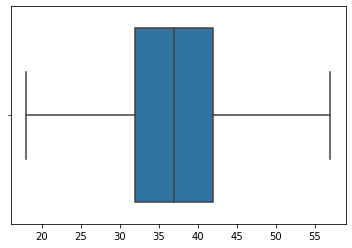

In [36]:
sns.boxplot(x=x)

## 7. Check for Categorical columns and perform encoding.

In [37]:
pd.Categorical(file_data["Geography"])

['France', 'Spain', 'France', 'France', 'Spain', ..., 'France', 'France', 'France', 'Germany', 'France']
Length: 10000
Categories (3, object): ['France', 'Germany', 'Spain']

In [38]:
# One Hot Encoding

pd.get_dummies(file_data["Geography"]).head(10)

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,1,0
8,1,0,0
9,1,0,0


In [39]:
pd.get_dummies(file_data).head(10)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,1,1,0
5,6,15574012,645,44,8,113755.78,2,1,0,149756.71,...,0,0,0,0,0,0,0,1,0,1
6,7,15592531,822,50,7,0.00,2,1,1,10062.80,...,0,0,0,0,0,1,0,0,0,1
7,8,15656148,376,29,4,115046.74,4,1,0,119346.88,...,0,0,0,0,0,0,1,0,1,0
8,9,15792365,501,44,4,142051.07,2,0,1,74940.50,...,0,0,0,0,0,1,0,0,0,1
9,10,15592389,684,27,2,134603.88,1,1,1,71725.73,...,0,0,0,0,0,1,0,0,0,1


## 8. Split the data into dependent and independent variables.

In [40]:
# Splitting the Dataset into the Independent

X = file_data.iloc[:, :-1].values
print(X)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


In [41]:
# Extracting the Dataset to Get the Dependent

Y = file_data.iloc[:, -1].values
print(Y)

[1 0 1 ... 1 1 0]


## 9. Scale the independent variables

In [42]:
from sklearn.preprocessing import scale

In [43]:
x = scale(file_data["EstimatedSalary"])
x

array([ 0.02188649,  0.21653375,  0.2406869 , ..., -1.00864308,
       -0.12523071, -1.07636976])

## 10. Split the data into training and testing

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x = file_data.drop("EstimatedSalary", axis=1)
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,1


In [46]:
y = file_data.EstimatedSalary
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [48]:
print(x_train.shape, x_test.shape)

(8000, 13) (2000, 13)
